# Prediction of life expectancy


## Overview

Advances in medicine, the proliferation of healthcare facilities and improved standards of care have all contributed to the increase in life expectancy over the past few decades. While this may seem like a great achievement for humanity, it has also resulted in more and more elderly people being placed into elderly care and assisted living communities. The ethics, benefits and disadvantages of sending parents to such facilities are controversial; however, this practice has increased the financial burden on both the private sector and the government.

We will use a subset of the lifespan dataset, provided by the Centers for Disease Control and Prevention's National Centers for Health Statistics page. The site hosts many open datasets on topics ranging from injury, poverty, women's health, education, health insurance and of course infectious diseases, .... But what you will use is the "Mean life expectancy by sex, race" dataset, whose statistics from the 1900s to the present are collected in the United States. We have included a copy of the dataset as **[life_expectancy.csv](https://drive.google.com/file/d/1efDU4iNsXdfDOwmTkLUkUsNxaI8v7--n/view?usp=sharing)**. The dataset only lists life expectancy for whites and blacks, because during most of the collection period it was the two major races that actively recorded their statistics in the United States.

## Target

* Build a Linear Regression model from the scikit-learn library to extrapolate how long people will live in the future. The private sector and governments reflect these calculations when calculating payments for social security, taxes, infrastructure, etc.

* Visualize the model after construction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

In [2]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

## 1. Data Normalization

In [4]:
#read data
x = pd.read_csv('life_expectancy.csv', delimiter='\t')
x.head(5)

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3


In [5]:
#investigating
print(x.shape)
print(x.describe())

(40, 5)
              Year  WhiteMale  WhiteFemale  BlackMale  BlackFemale
count    40.000000  40.000000    40.000000  40.000000    40.000000
mean   1991.250000  72.730000    78.592500  65.912500    73.262500
std      20.536085   4.968681     5.200561   6.422284     7.157592
min    1900.000000  46.600000    48.700000  32.500000    33.500000
25%    1984.750000  71.800000    78.700000  64.575000    73.400000
50%    1994.500000  73.350000    79.650000  65.250000    73.900000
75%    2004.250000  75.500000    80.500000  69.425000    76.125000
max    2014.000000  76.700000    81.400000  72.500000    78.400000


In [32]:
#create_model
from sklearn import linear_model

model = linear_model.LinearRegression(fit_intercept=False)

In [33]:
#split data sets
data_train = x[x['Year'] < 1986]
X_train = data_train[['Year']]
y_train = data_train[['WhiteMale']]

## 2. Train model

Est 2014 Linear Regression Life Expectancy:  [69.51813792]
Est 2030 Linear Regression Life Expectancy:  [70.07041707]
Est 2045 Linear Regression Life Expectancy:  [70.58817877]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


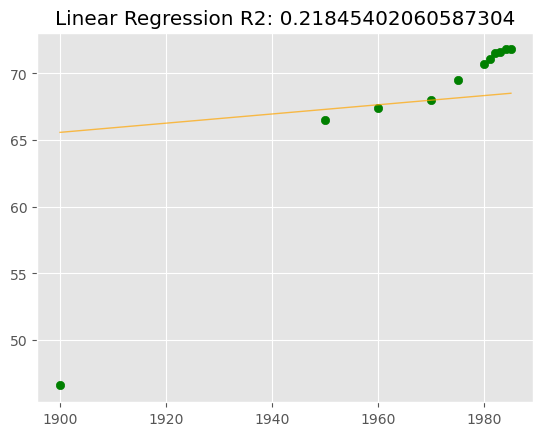

In [36]:
#train model
model.fit(X_train, y_train)
title='Linear Regression'

#drawLine
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, c='g', marker='o')
ax.plot(X_train, model.predict(X_train), color='orange', linewidth=1, alpha=0.7)

print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

score = model.score(X_train, y_train)
title += " R2: " + str(score)
ax.set_title(title)

plt.show()

## 3. Model evaluation

In [45]:
#initiate var
data_test =  x[x['Year'] >= 1986]
x_test = data_test[['Year']]
y_test = data_test[['WhiteMale']]

#predict by model
model.predict(x_test)

array([[68.55164941],
       [68.58616685],
       [68.6206843 ],
       [68.65520175],
       [68.6897192 ],
       [68.72423664],
       [68.75875409],
       [68.79327154],
       [68.82778898],
       [68.86230643],
       [68.89682388],
       [68.93134132],
       [68.96585877],
       [69.00037622],
       [69.03489366],
       [69.06941111],
       [69.10392856],
       [69.138446  ],
       [69.17296345],
       [69.2074809 ],
       [69.24199834],
       [69.27651579],
       [69.31103324],
       [69.34555068],
       [69.38006813],
       [69.41458558],
       [69.44910303],
       [69.48362047],
       [69.51813792]])

In tuổi thọ thực tế của 'WhiteMale' 2014 từ tập dữ liệu đã tải

In [43]:
y_test.head()

,WhiteMale
11,71.9
12,72.1
13,72.2
14,72.5
15,72.7


Lặp lại quá trình, nhưng thay vì cho WhiteMale, lần này chọn BlackFemale. Tạo một lát cho BlackFemales, fit mô hình, sau đó gọi `drawLine`. Cuối cùng, hãy in ra tuổi thọ thực tế của BlackFemale 2014:

In [57]:
#split data sets
data_train = x[x['Year'] < 1986]
X_train = data_train[['Year']]
y_train = data_train[['BlackFemale']]

In [53]:
#model
BlackFemale = linear_model.LinearRegression(fit_intercept=False)

In [54]:
#training
BlackFemale.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

Est 2014 Linear Regression Life Expectancy:  [69.51813792]
Est 2030 Linear Regression Life Expectancy:  [70.07041707]
Est 2045 Linear Regression Life Expectancy:  [70.58817877]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


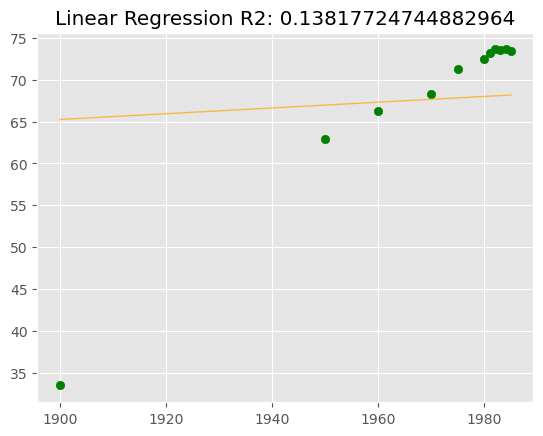

In [55]:
#title
title='Linear Regression'

#drawLine
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, c='g', marker='o')
ax.plot(X_train, BlackFemale.predict(X_train), color='orange', linewidth=1, alpha=0.7)

print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

score = model.score(X_train, y_train)
title += " R2: " + str(score)
ax.set_title(title)

plt.show()

Correlation Matrix:

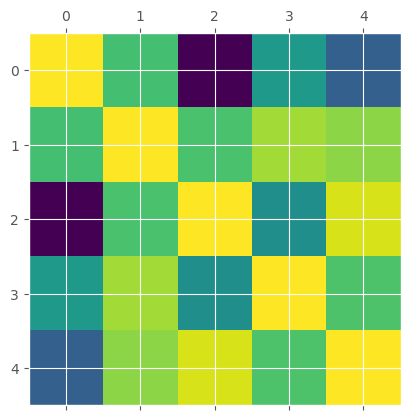

In [67]:
plt.matshow(x.corr())
plt.show()